In [1]:
!pip install requests
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import requests

# Fonction pour extraire des données
https://api.covid19api.com/

In [2]:
def getCountryData(country):
  r = requests.get('https://api.covid19api.com/dayone/country/'+country)
  res=r.json()
  df=pd.DataFrame(res)
  df=df[df["Province"]==""]
  #df.to_csv('ma.csv',index=False)
  c=np.array(df['Confirmed'])
  return c

In [3]:
Nma=36.89e6 #morocco
Nes=46.7e6 #Spain
Nde=83.7e6 #Germany
Nalg=43.8e6 #1lgeria
Nmx=128.86e6 #mexico
Nfr=65.26e6#france
Niq=40.2e6 #Iraq

# Extraction des données de Ma, Fr ES, IQ

In [4]:
ma=getCountryData("ma")/Nma
alg=getCountryData("dz")/Nalg
fr=getCountryData("fr")/Nfr
es=getCountryData("es")/Nes
ir=getCountryData("iq")/Niq
data=1e6*np.array([ma,alg,fr,es,ir])

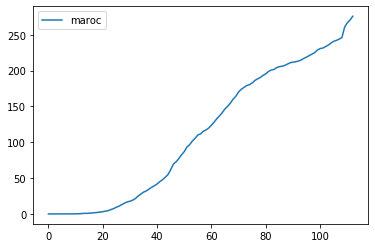

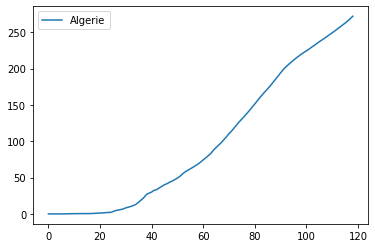

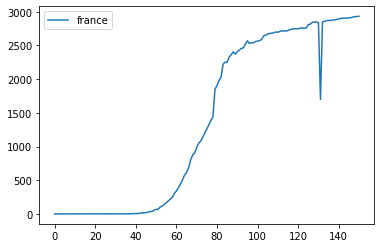

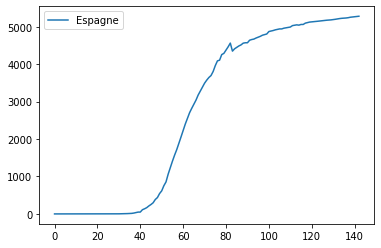

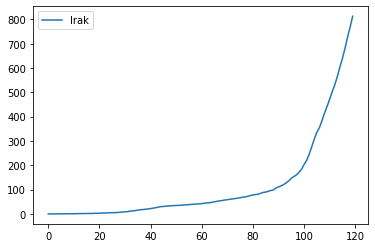

In [5]:
plt.figure()
plt.plot(data[0],label="maroc")
plt.legend()

plt.figure()
plt.plot(data[1],label="Algerie")
plt.legend()


plt.figure()
plt.plot(data[2],label="france")
plt.legend()

plt.figure()
plt.plot(data[3],label="Espagne")
plt.legend()

plt.figure()
plt.plot(data[4],label="Irak")
plt.legend()



In [29]:
import numpy as np
import scipy.spatial.distance as sc
try:
    import ot
except ImportError:
    print("POT (Python Optimal Transport) package is not installed. ")


def proj_Points(X):
   
    Z = (X[:,0] + X[:,1]) / 2.
    return np.array([Z , Z]).T

def dist_matrix(X,Y,p=2.):
   
    C = sc.cdist(X,Y, metric='minkowski', p=p)**p
    Xdiag = proj_Points(X)
    Ydiag = proj_Points(Y)
    Cxd = np.linalg.norm(X - Xdiag, ord=p, axis=1)**p
    Cf = np.hstack((C, Cxd[:,None]))
    Cdy = np.linalg.norm(Y - Ydiag, ord=p, axis=1)**p
    Cdy = np.append(Cdy, 0)
    Cf = np.vstack((Cf, Cdy[None,:]))
    return Cf

def Wdist(X, Y, reg=0., p=2.):
    
    M = dist_matrix(X,Y,p=p)
    n = len(X)
    m = len(Y)
    a = 1.0 / (n + m) * np.ones(n)  #vecteur de poids
    hat_a = np.append(a, m/(n+m))  # mesure de probabilité pour emd2
    b = 1.0 / (n + m) * np.ones(m)  
    hat_b = np.append(b, n/(m+n))  
    if reg > 0:
        ot_cost = (n+m) * ot.bregman.sinkhorn2(hat_a, hat_b, M, reg=reg)
    else:
        ot_cost = (n+m) * ot.emd2(hat_a, hat_b, M)
    return np.power(ot_cost, 1./p)

Estimation of Wasserstein distance:
752.9450252822608
(143, 143)


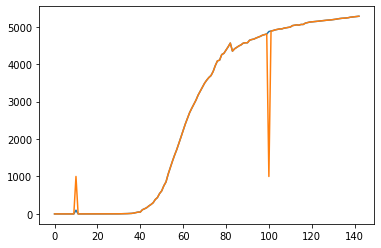

In [61]:
A=data[3]
B=data[2]

n=min(len(A),len(B))
A=A[0:n]
B=np.array(A[0:n])
B[10]=1000
B[100]=1000
plt.plot(A)
plt.plot(B)
x=np.linspace(0,n-1,n)
y=np.linspace(0,n-1,n)
X = np.array([x,A]).T
Y = np.array([y,B]).T
p = 2.
reg = 0.
print("Estimation of Wasserstein distance:")
print(Wdist(X, Y, reg=reg, p=p))
#print(sc.cdist(X,Y, metric='minkowski', p=p)**p)
print(np.shape(sc.cdist(X,Y, 'euclidean')))
